<a href="https://colab.research.google.com/github/Sushant6862/Jeremy-Howard-Squadron-/blob/main/House_Price_Advanced_Reg_Tech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/House Price Advanced_Regression Tech'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/House Price Advanced_Regression Tech/data_description.txt
/content/drive/MyDrive/House Price Advanced_Regression Tech/sample_submission.csv
/content/drive/MyDrive/House Price Advanced_Regression Tech/test.csv
/content/drive/MyDrive/House Price Advanced_Regression Tech/train.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the data
train_data = pd.read_csv("/content/drive/MyDrive/House Price Advanced_Regression Tech/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/House Price Advanced_Regression Tech/test.csv")

# Combine train and test data for preprocessing
all_data = pd.concat([train_data, test_data], ignore_index=True)

In [4]:

all_data.head() # to get first 5 rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [5]:
all_data.info()   # to get info. of data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [8]:
missing_val_col = train_data.isnull().mean() > 0.5  # to get the know which column has more than 50% missing values

print("Columns with more than 50% missing values in train_data:")
print(train_data.columns[missing_val_col])

Columns with more than 50% missing values in train_data:
Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [9]:
all_data = all_data.loc[:, ~missing_val_col]

In [10]:
# Handle missing values in numerical columns with the mean
numerical_columns_with_missing_values = all_data.select_dtypes(include=[np.number]).columns[all_data.select_dtypes(include=[np.number]).isnull().any()]
all_data[numerical_columns_with_missing_values] = all_data[numerical_columns_with_missing_values].fillna(all_data[numerical_columns_with_missing_values].mean())

# Handle missing values in categorical columns with the mode
categorical_columns_with_missing_values = all_data.select_dtypes(include=['object']).columns[all_data.select_dtypes(include=['object']).isnull().any()]
all_data[categorical_columns_with_missing_values] = all_data[categorical_columns_with_missing_values].fillna(all_data[categorical_columns_with_missing_values].mode().iloc[0])
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [11]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['Age'] = all_data['YrSold'] - all_data['YearBuilt']
all_data['Remodeled'] = (all_data['YearRemodAdd'] != all_data['YearBuilt']).astype(int)

In [12]:
all_data = all_data.drop(["Utilities", "Street"], axis=1)


In [13]:
all_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSF,Age,Remodeled
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890,2547.843021,36.479959,0.465570
std,842.787043,42.517628,21.312345,7886.996359,1.409947,1.113131,30.291442,20.894344,178.626089,455.532750,...,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,56174.332503,804.616684,30.336182,0.498899
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,334.000000,-1.000000,0.000000
25%,730.500000,20.000000,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,163000.000000,2000.000000,7.000000,0.000000
50%,1460.000000,50.000000,69.305795,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,369.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,180921.195890,2448.000000,35.000000,0.000000
75%,2189.500000,70.000000,78.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,180921.195890,2991.500000,54.500000,1.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000,11752.000000,136.000000,1.000000


In [14]:
# One-hot encode categorical variables
all_data = pd.get_dummies(all_data)

In [15]:
# Calculate the correlation matrix for all_data
correlation_matrix = all_data.corr()

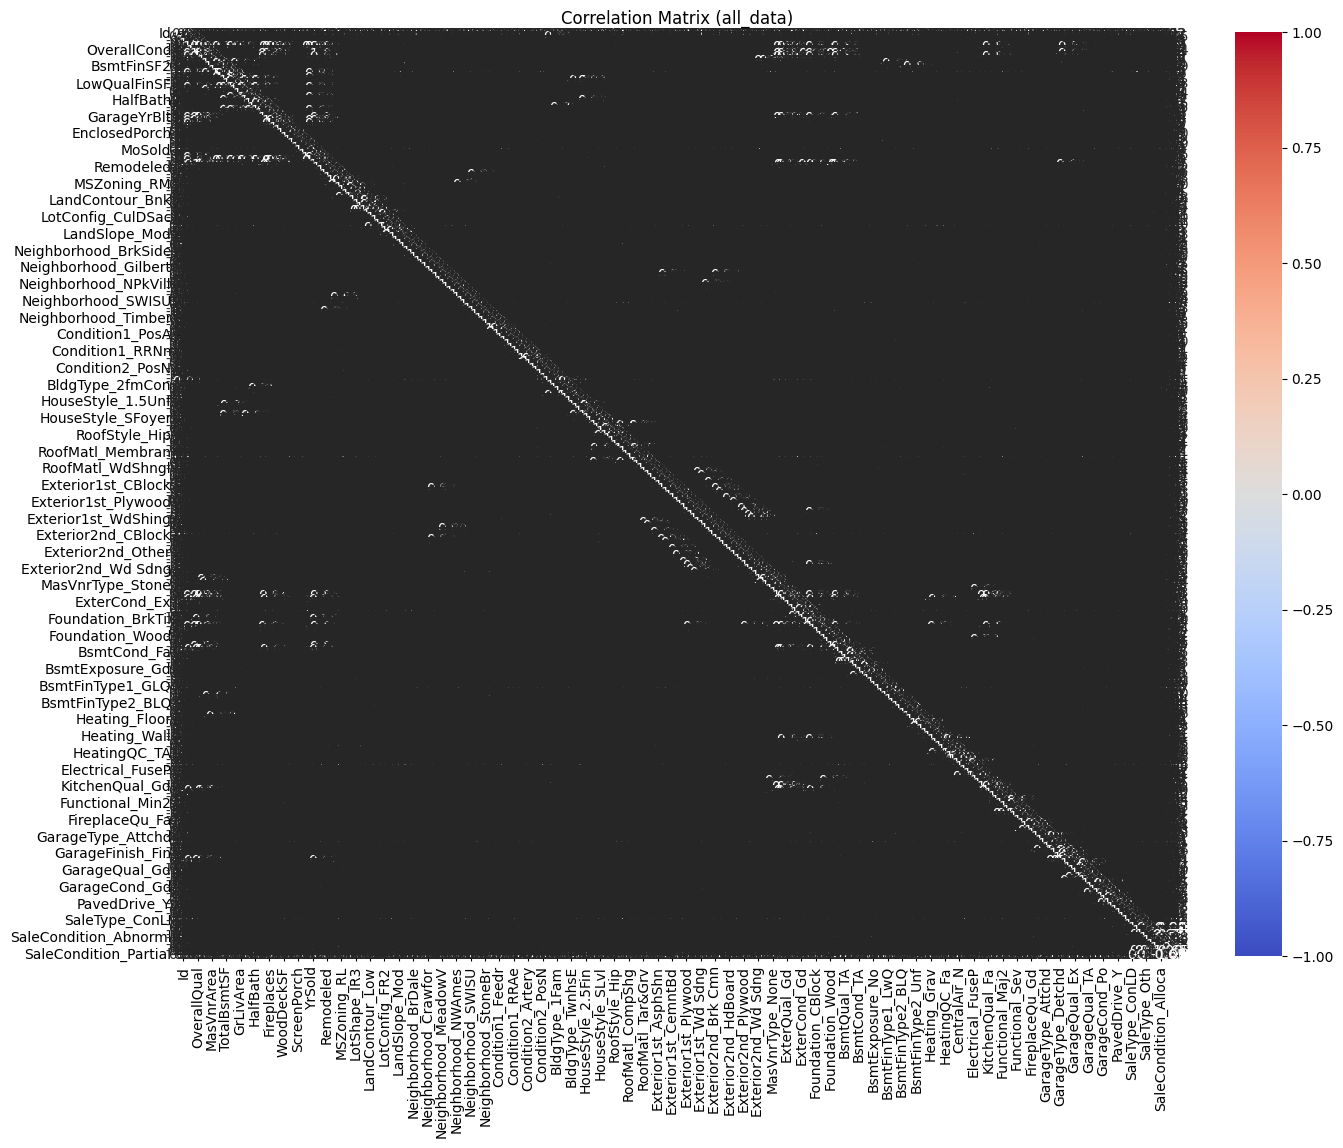

In [16]:
# Create a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (all_data)")
plt.show()

In [17]:
# Identify and store pairs of highly correlated features
highly_correlated_pairs = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_pairs.add((colname_i, colname_j))

# Remove one feature from each correlated pair
for pair in highly_correlated_pairs:
    feature1, feature2 = pair
    # Remove feature2 from all_data
    if ((feature2 in all_data.columns) and (feature1 in all_data.columns)):
        all_data.drop(feature2, axis=1, inplace=True)

In [18]:
# Log transformation of SalePrice
all_data['SalePrice'] = np.log1p(all_data['SalePrice'])

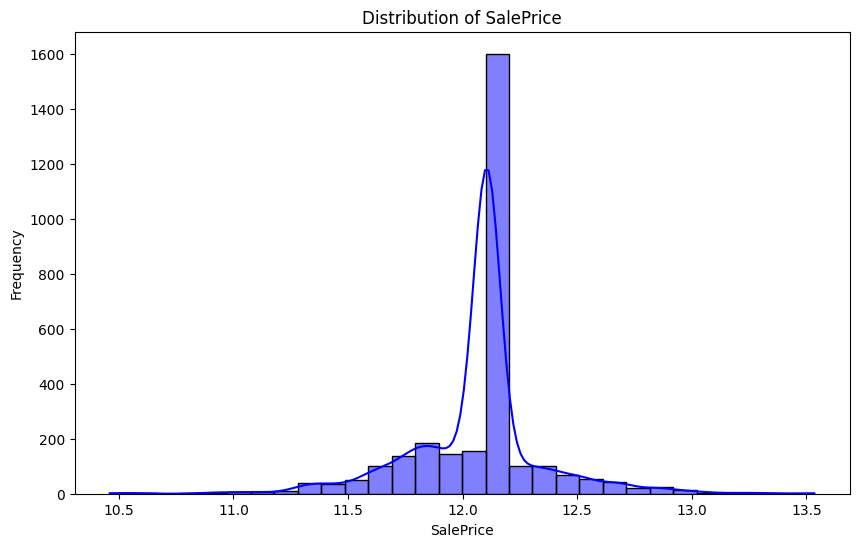

In [19]:
plt.figure(figsize=(10, 6))

# Plot the distribution of the target variable (SalePrice)
sns.histplot(all_data['SalePrice'], kde=True, color='blue', bins=30)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()